In [23]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Definir la ruta a la carpeta Data
results_path = '../Data'

# Cargar los datos
file_path = os.path.join(results_path, 'Centro_comercial.csv')
df = pd.read_csv(file_path)

In [3]:
df.rename(columns={
    'CustomerID': 'ID_Cliente',
    'Genre': 'Genero',
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso_Anual',
    'Spending Score (1-100)': 'Puntaje_Gasto'
}, inplace=True)

df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})

In [4]:
# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


ID_Cliente     Genero  Edad  Ingreso_Anual  Puntaje_Gasto
0           1  Masculino    19             15             39
1           2  Masculino    21             15             81
2           3   Femenino    20             16              6
3           4   Femenino    23             16             77
4           5   Femenino    31             17             40

In [5]:
# Descripción general del DataFrame
print("Descripción general de los datos:")
print(df.info())

Descripción general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Cliente     200 non-null    int64 
 1   Genero         200 non-null    object
 2   Edad           200 non-null    int64 
 3   Ingreso_Anual  200 non-null    int64 
 4   Puntaje_Gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# formato de las columnas
df['ID_Cliente'] = df['ID_Cliente'].astype(str)
df['Genero'] = df['Genero'].astype(str)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())
print(" ")
# Tabla de frecuencia para la variable 'Gender'
tabla_frecuencia = df['Genero'].value_counts()
print("Tabla de frecuencia de la variable 'Genero':")
print(tabla_frecuencia)

# valores flatantes
print("Conteo de valores faltantes por columna:")
print(df.isnull().sum())

# Verificar si hay filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Estadísticas descriptivas:
             Edad  Ingreso_Anual  Puntaje_Gasto
count  200.000000     200.000000     200.000000
mean    38.850000      60.560000      50.200000
std     13.969007      26.264721      25.823522
min     18.000000      15.000000       1.000000
25%     28.750000      41.500000      34.750000
50%     36.000000      61.500000      50.000000
75%     49.000000      78.000000      73.000000
max     70.000000     137.000000      99.000000
 
Tabla de frecuencia de la variable 'Genero':
Femenino     112
Masculino     88
Name: Genero, dtype: int64
Conteo de valores faltantes por columna:
ID_Cliente       0
Genero           0
Edad             0
Ingreso_Anual    0
Puntaje_Gasto    0
dtype: int64
Número de filas duplicadas: 0


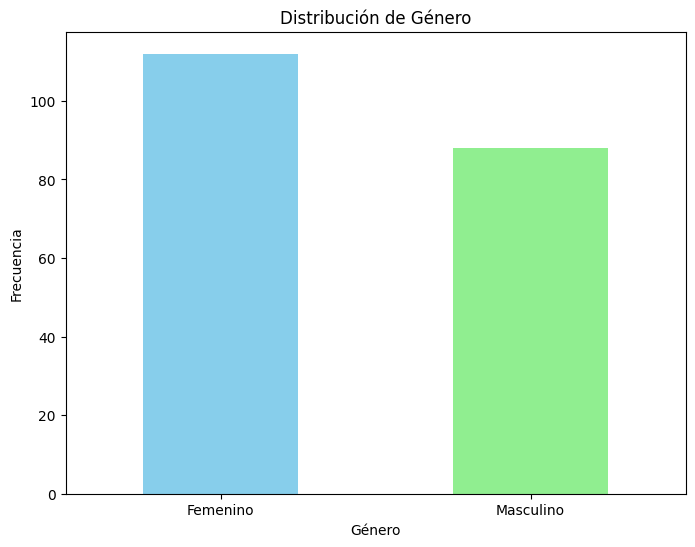

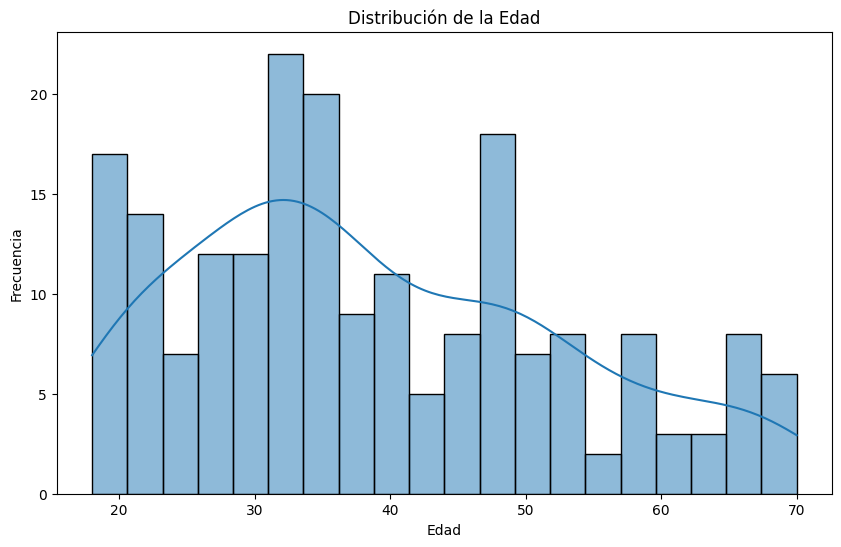

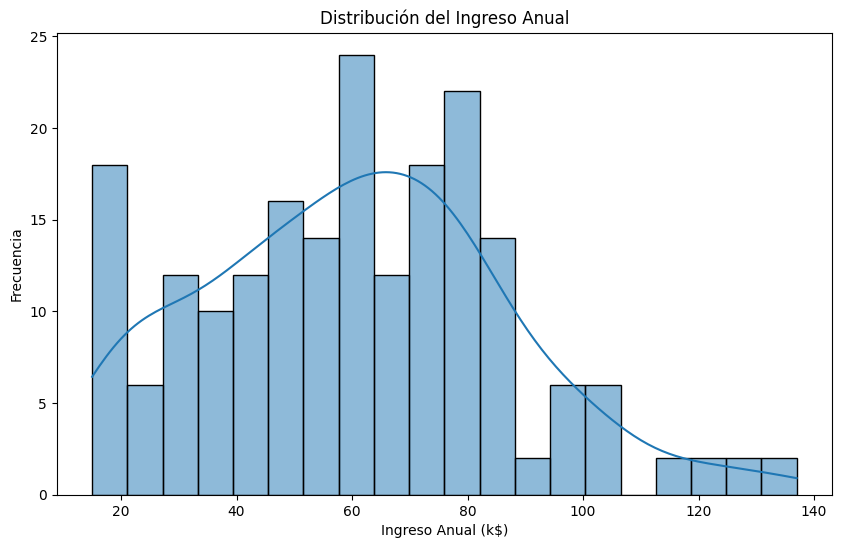

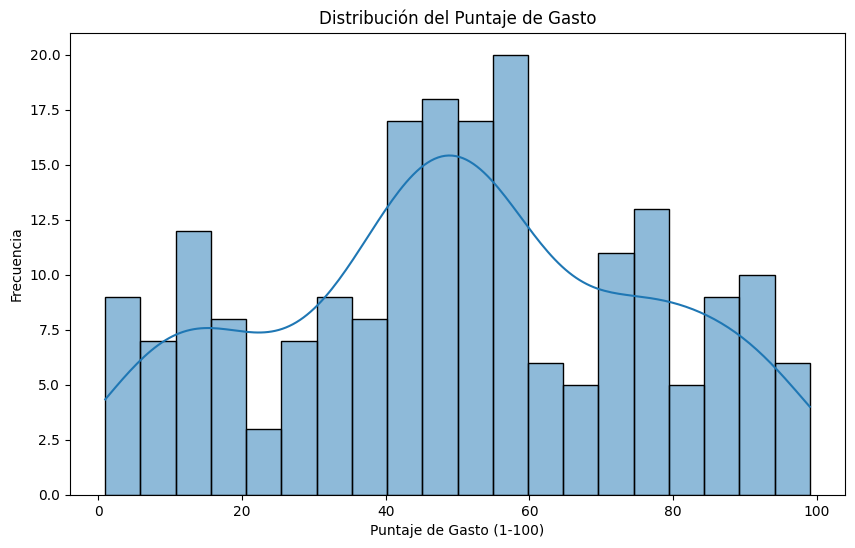

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\393337251.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


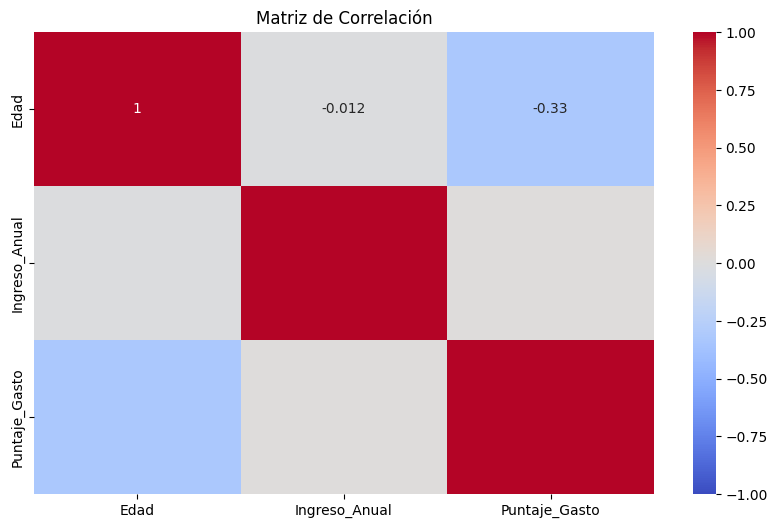

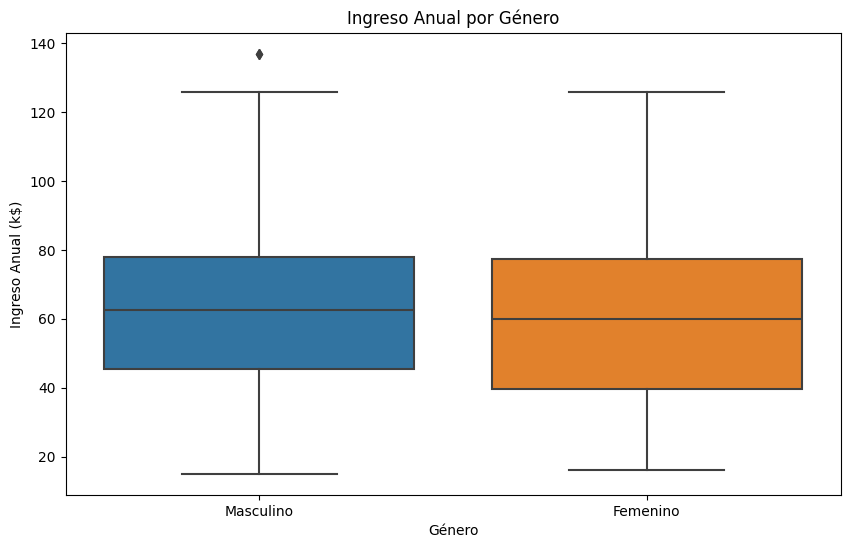

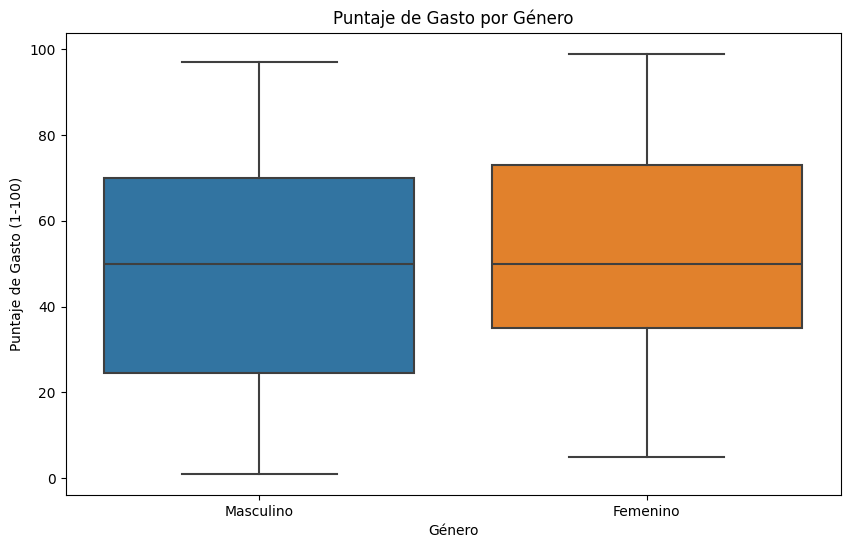

In [7]:
# Definir la ruta a la carpeta Results
results_path = '../Results'

# Asegúrate de que la carpeta Results existe
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Gráfico de barras para la variable 'Gender'
plt.figure(figsize=(8, 6))
tabla_frecuencia.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.savefig(os.path.join(results_path, 'Distribucion_Genero.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Edad'
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Edad.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Ingreso Anual'
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingreso_Anual'], bins=20, kde=True)
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Ingreso_Anual.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Spending Score'
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje_Gasto'], bins=20, kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Puntaje_Gasto.png'))  # Guardar el gráfico
plt.show()

# Análisis de correlación entre las variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.savefig(os.path.join(results_path, 'Matriz_Correlacion.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Ingreso Anual por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Ingreso_Anual', data=df)
plt.title('Ingreso Anual por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.savefig(os.path.join(results_path, 'Ingreso_Anualpor_Genero.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Puntaje de Gasto por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.savefig(os.path.join(results_path, 'Puntaje_Gasto_por_Genero.png'))  # Guardar el gráfico
plt.show()


### Transformacion de variables


Ingresos y puntajes de gastos por grupo Edad:
            Ingreso_Anual            Puntaje_Gasto           
                    mean        std          mean        std
Grupo_Edad                                                  
18-24          43.806452  21.257813     55.774194  25.219978
25-34          71.148148  27.894956     63.166667  24.283506
35-44          66.809524  27.800893     49.428571  30.700078
45-54          58.641026  24.315348     36.230769  16.261776
55-64          56.000000  21.975744     32.312500  21.752299
65+            51.285714  12.602982     46.714286  11.431593

Ingresos y puntajes de gastos por grupo Edad y género:
                      Ingreso_Anual            Puntaje_Gasto           
                              mean        std          mean        std
Grupo_Edad Genero                                                     
18-24      Femenino      41.222222  19.585576     60.611111  22.186745
           Masculino     47.384615  23.715461     49.076923  2

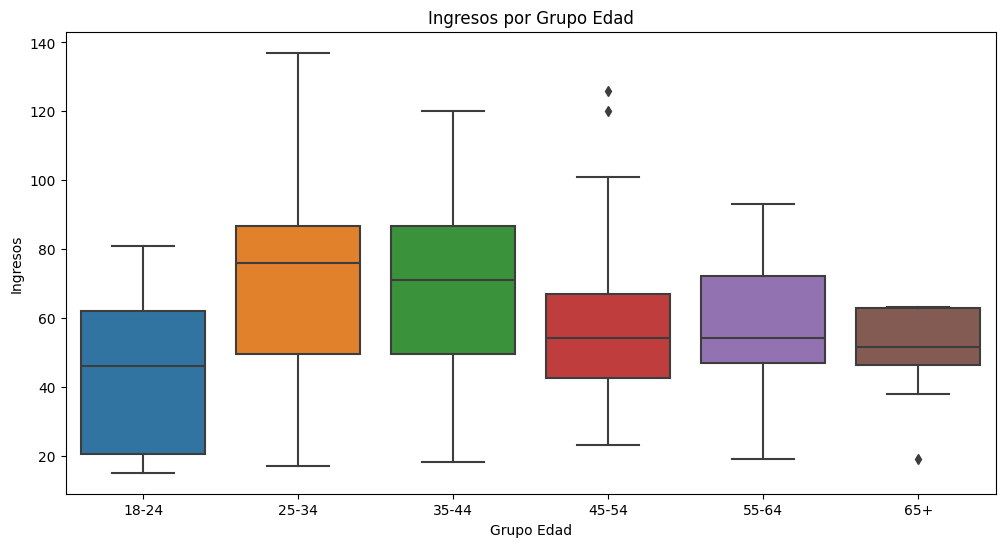

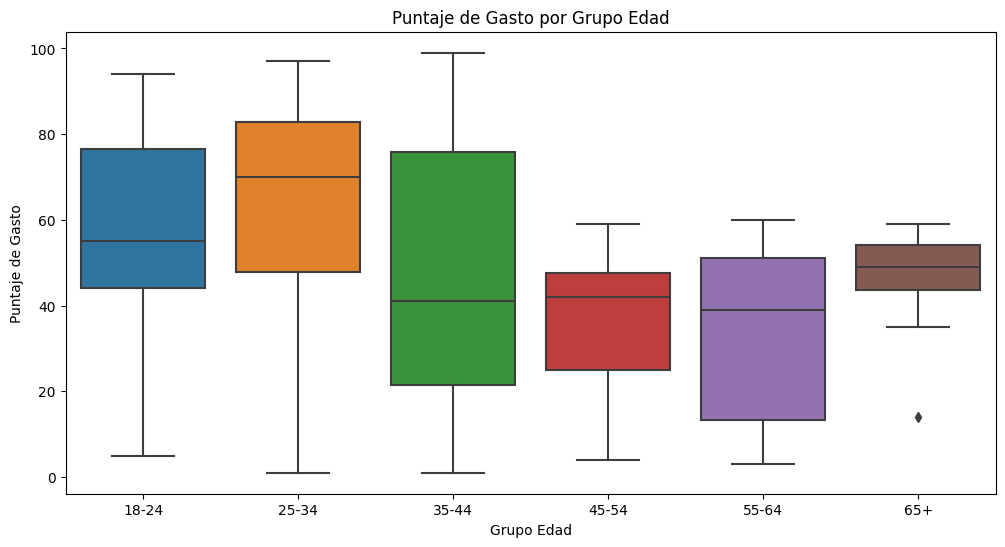

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\56562481.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)


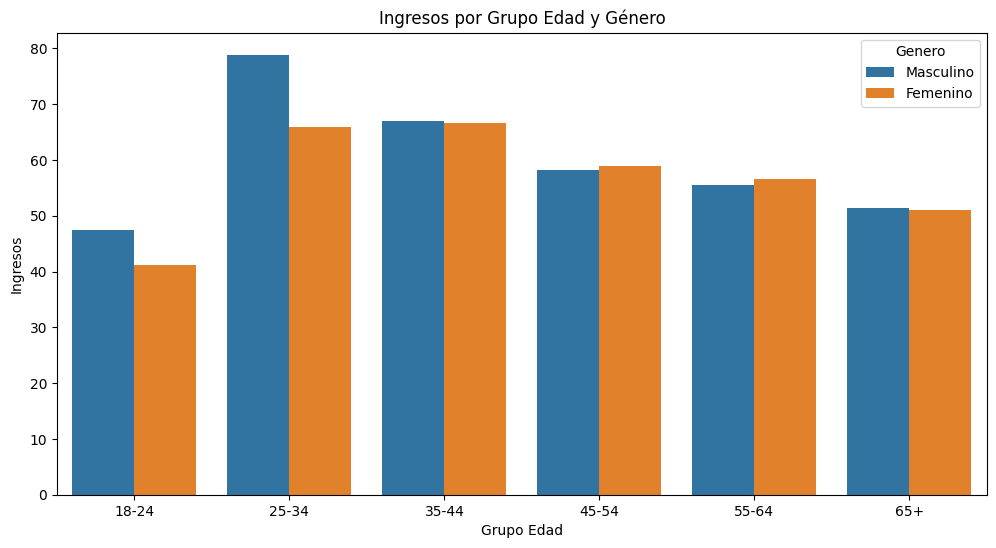

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\56562481.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)


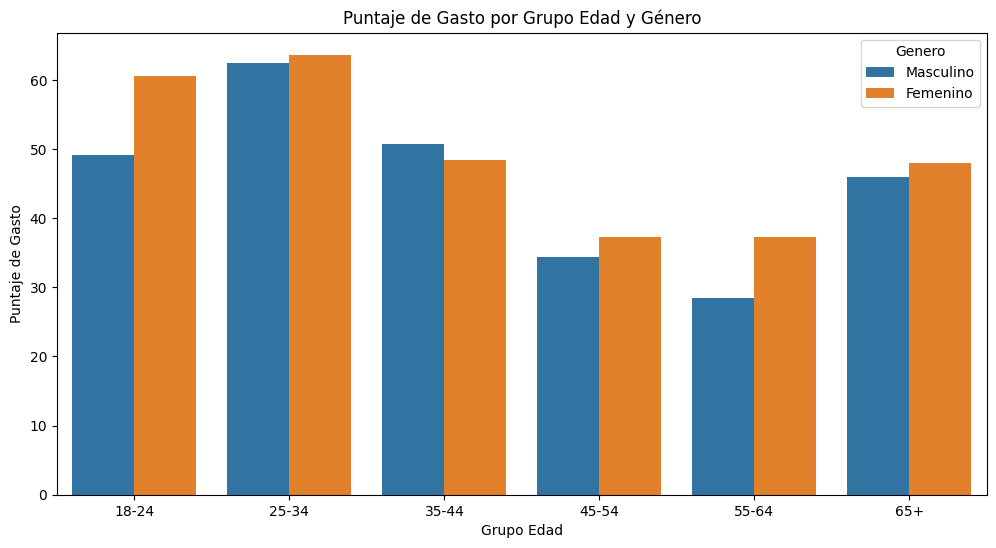

In [8]:
# Crear grupos Edads
bins = [18, 24, 34, 44, 54, 64, 120]  # Los límites de los grupos Edads
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

#Comparar ingresos y puntajes de gastos por grupos Edads
age_group_stats = df.groupby('Grupo_Edad').agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad:\n", age_group_stats)

#Comparar ingresos y puntajes de gastos por grupos Edads y género
age_gender_stats = df.groupby(['Grupo_Edad', 'Genero']).agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad y género:\n", age_gender_stats)

# Convertir Genero a valores binarios
df['Genero_Binario'] = df['Genero'].map({'Masculino': 1, 'Femenino': 0})

# Verificar la conversión de genero
print("\nconversión de variable genero:\n")
print(df[['Genero', 'Genero_Binario']].head())


# Boxplot de Ingresos por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Ingreso_Anual', data=df)
plt.title('Ingresos por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()

# Boxplot de Puntaje de Gasto por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()

# Gráfico de Barras de Ingresos por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)
plt.title('Ingresos por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()


# Gráfico de Barras de Puntaje de Gasto por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)
plt.title('Puntaje de Gasto por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()





### Estandarizacion


In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
columnas_numericas = ['Edad', 'Ingreso_Anual', 'Puntaje_Gasto']
datos_numericos = df[columnas_numericas]

# Estandarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos_numericos)

print(pd.DataFrame(datos_estandarizados, columns=columnas_numericas).head())

       Edad  Ingreso_Anual  Puntaje_Gasto
0 -1.424569      -1.738999      -0.434801
1 -1.281035      -1.738999       1.195704
2 -1.352802      -1.700830      -1.715913
3 -1.137502      -1.700830       1.040418
4 -0.563369      -1.662660      -0.395980


## **PCA**


In [10]:
from sklearn.decomposition import PCA

# Aplicar PCA sin restringir el número de componentes
pca_full = PCA()
pca_full.fit(datos_estandarizados)

varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

# Mostrar los valores de varianza explicada y acumulada
print("Varianza explicada por cada componente:", varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)



Varianza explicada por cada componente: [0.44266167 0.33308378 0.22425454]
Varianza acumulada: [0.44266167 0.77574546 1.        ]


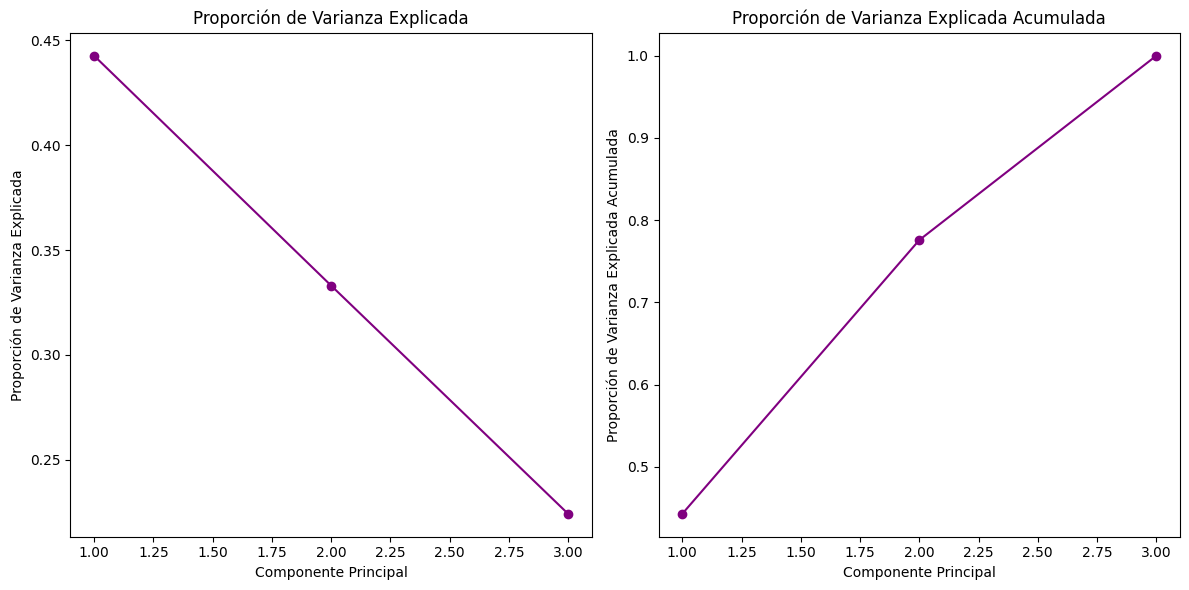

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', color='purple')
plt.title('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='purple')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')

plt.tight_layout()
plt.show()


El gráfico sugiere que cada componente contribuye de manera significativa, ya que no hay un "codo" claro que indique que puedas reducir el número de componentes sin perder mucha información.

### Cargas (Loadings) 

In [12]:
import pandas as pd

# Cargas de los componentes
cargas_pca = pd.DataFrame(pca_full.components_, columns=datos_numericos.columns, index=[f'PC{i+1}' for i in range(pca_full.n_components_)])
print("Cargas de los componentes principales:")
print(cargas_pca)



Cargas de los componentes principales:
         Edad  Ingreso_Anual  Puntaje_Gasto
PC1  0.706382      -0.048024      -0.706199
PC2  0.030141       0.998832      -0.037775
PC3 -0.707188      -0.005398      -0.707005


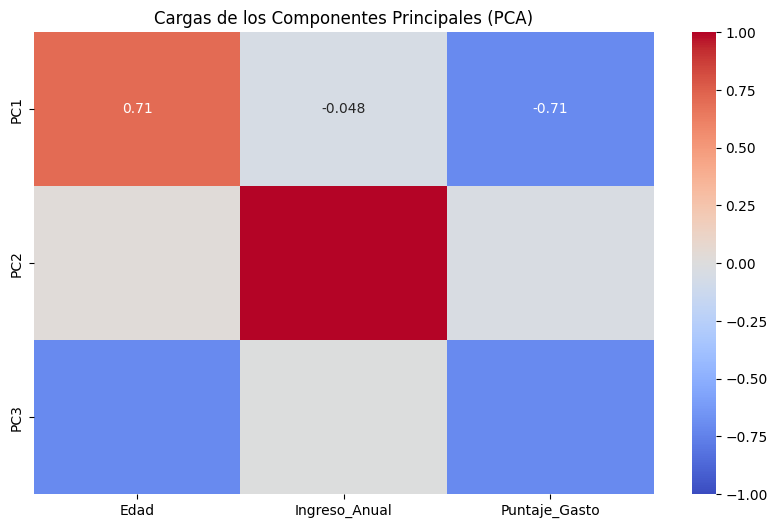

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap para visualizar las cargas
plt.figure(figsize=(10, 6))
sns.heatmap(cargas_pca, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cargas de los Componentes Principales (PCA)")
plt.show()


Al interpretar las cargas de los componentes principales, se observa lo siguiente:

En PC1, la Edad y el Puntaje de Gasto tienen cargas altas pero en direcciones opuestas, con una carga positiva para la edad y negativa para el puntaje de gasto. Esto sugiere una relación inversa entre ambas variables, lo que significa que las personas de mayor edad tienden a gastar menos y las personas más jóvenes tienden a gastar más.

En PC2, la variable que más influye es el Ingreso Anual, con una carga muy alta. Esto indica que PC2 captura principalmente la variabilidad en el ingreso de los clientes.

En PC3, nuevamente existe una relación inversa significativa entre la Edad y el Puntaje de Gasto, pero en una dirección diferente a la observada en PC1, lo que sugiere que este componente también captura patrones de comportamiento entre estas variables.

### Algoritmos de clustering 

clustering jerárquico, y DBSCAN. K-means  y  K-medoide y Modelo  de 
Mezcla Gaussiana (GMM)

#### Clustering Jerárquico

In [14]:
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns=columnas_numericas)
datos_estandarizados['Genero_Binario'] = df['Genero_Binario']

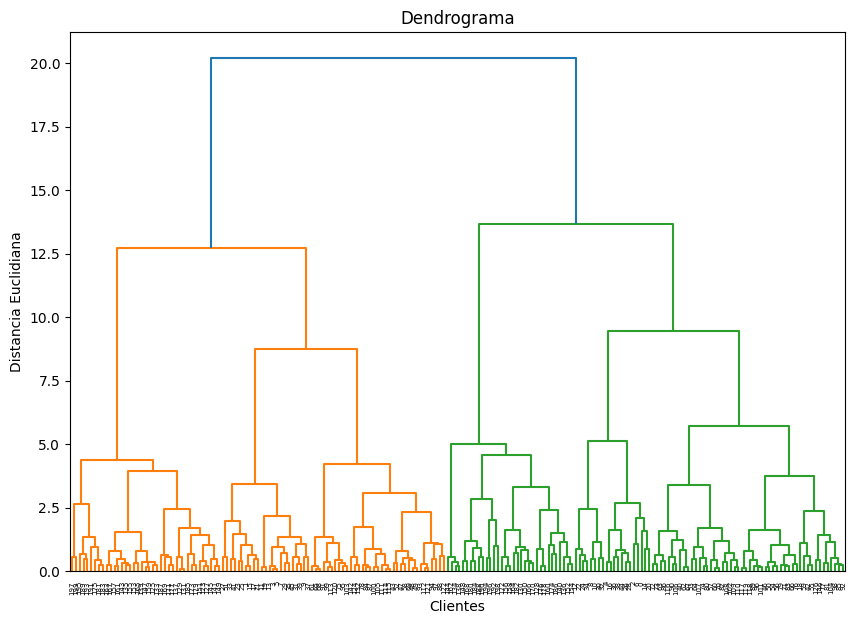

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrograma para encontrar el número óptimo de clusters
plt.figure(figsize=(10, 7))
dendrograma = sch.dendrogram(sch.linkage(datos_estandarizados, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Aplicar Clustering Jerárquico
num_clusters = 6  # Número de clusters desde el dendograma
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(datos_estandarizados)

# Agregar la columna de clusters jerárquicos al DataFrame original
df['Cluster_Jerarquico'] = y_hc




In [21]:
# Agrupar por 'Cluster_Jerarquico' y calcular las estadísticas
cluster_descriptions = df.groupby('Cluster_Jerarquico').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)


Descripción de los clusters encontrados:
                     Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_Jerarquico                                                             
0                            53.620000          10.020163                 23   
1                            25.250000           7.397546                 15   
2                            89.090909          16.451375                 71   
3                            86.538462          16.312485                 69   
4                            57.228571           9.985536                 39   
5                            26.434783           8.134249                 15   

                    Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_Jerarquico                                                             
0                                  77           48.240000           7.133022   
1                                  39           19.050000          12.910522 

#### DBSCAN

In [29]:
df

ID_Cliente     Genero  Edad  Ingreso_Anual  Puntaje_Gasto Grupo_Edad  \
0            1  Masculino    19             15             39      18-24   
1            2  Masculino    21             15             81      18-24   
2            3   Femenino    20             16              6      18-24   
3            4   Femenino    23             16             77      18-24   
4            5   Femenino    31             17             40      25-34   
..         ...        ...   ...            ...            ...        ...   
195        196   Femenino    35            120             79      35-44   
196        197   Femenino    45            126             28      45-54   
197        198  Masculino    32            126             74      25-34   
198        199  Masculino    32            137             18      25-34   
199        200  Masculino    30            137             83      25-34   

     Genero_Binario  Cluster_Jerarquico  Cluster_DBSCAN  
0                 1                   1              -1  
1                 1                   5               0  
2                 0                   1              -1  
3                 0                   5               1  
4                 0                   1               1  
..              ...                 ...             ...  
195               0                   3               1  
196               0                   2              -1  
197               1                   3              -1  
198               1                   2              -1  
199               1                   3              -1  

[200 rows x 9 columns]

In [28]:
datos_estandarizados['Grupo_Edad'] = df['Grupo_Edad']
#datos_estandarizados['Grupo_Edad'] = datos_estandarizados['Grupo_Edad'].astype('str')


Edad  Ingreso_Anual  Puntaje_Gasto  Genero_Binario
0   -1.424569      -1.738999      -0.434801               1
1   -1.281035      -1.738999       1.195704               1
2   -1.352802      -1.700830      -1.715913               0
3   -1.137502      -1.700830       1.040418               0
4   -0.563369      -1.662660      -0.395980               0
..        ...            ...            ...             ...
195 -0.276302       2.268791       1.118061               0
196  0.441365       2.497807      -0.861839               0
197 -0.491602       2.497807       0.923953               1
198 -0.491602       2.917671      -1.250054               1
199 -0.635135       2.917671       1.273347               1

[200 rows x 4 columns]

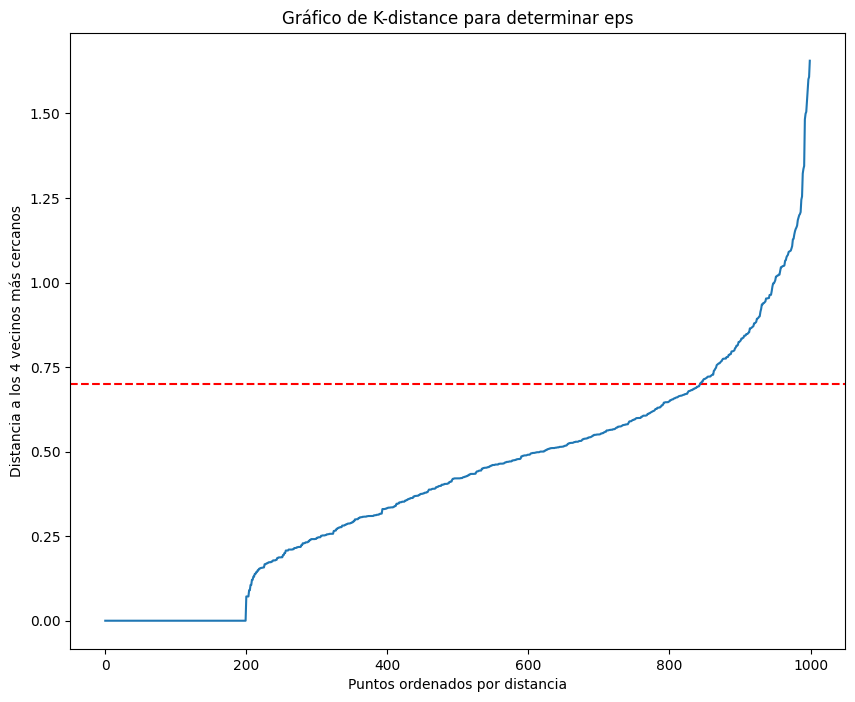

La parte exponencial de la curva comienza alrededor de una distancia de:  0.7221407011232333
Número de clusters encontrados por DBSCAN: 8
Descripción de los clusters encontrados:
                 Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_DBSCAN                                                             
-1                       59.227273          47.669429                 15   
 0                       24.875000           6.854352                 15   
 1                       55.893617          22.654235                 16   
 2                       62.878788          15.436883                 39   
 3                       55.545455           8.347019                 42   
 4                       81.562500          10.321297                 69   
 5                       76.250000           3.593976                 73   
 6                       88.333333          11.734435                 73   

                Ingreso_Anual_Max  Puntaje_Gasto_Mean  Punt

In [27]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Calcular las distances a los 4 vecinos más cercanos, conjuntos de datos pequeños (menos de 1000 puntos): Puedes usar un valor de n_neighbors entre 3 y 5.
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(datos_estandarizados)
distances, indices = neighbors_fit.kneighbors(datos_estandarizados)

# Ordenar las distances y graficar
distances = np.sort(distances.flatten())
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.7, color = 'r', linestyle = '--')
plt.plot(distances)
plt.title('Gráfico de K-distance para determinar eps')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia a los 4 vecinos más cercanos')
plt.show()


from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print("La parte exponencial de la curva comienza alrededor de una distancia de: ",distances[knee.knee])

# Elegimos eps basado en el gráfico y en Knee, tomamos min_samples=4 (valor común para datasets medianos)
eps_value = distances[knee.knee]  
dbscan = DBSCAN(eps=eps_value, min_samples=4)
df['Cluster_DBSCAN'] = dbscan.fit_predict(datos_estandarizados)

# Contar el número de clusters
num_clusters_dbscan = len(np.unique(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'] else 0)
print(f'Número de clusters encontrados por DBSCAN: {num_clusters_dbscan}')


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_DBSCAN').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)



#### K-Means

In [31]:
datos_estandarizados

Edad  Ingreso_Anual  Puntaje_Gasto  Genero_Binario
0   -1.424569      -1.738999      -0.434801               1
1   -1.281035      -1.738999       1.195704               1
2   -1.352802      -1.700830      -1.715913               0
3   -1.137502      -1.700830       1.040418               0
4   -0.563369      -1.662660      -0.395980               0
..        ...            ...            ...             ...
195 -0.276302       2.268791       1.118061               0
196  0.441365       2.497807      -0.861839               0
197 -0.491602       2.497807       0.923953               1
198 -0.491602       2.917671      -1.250054               1
199 -0.635135       2.917671       1.273347               1

[200 rows x 4 columns]

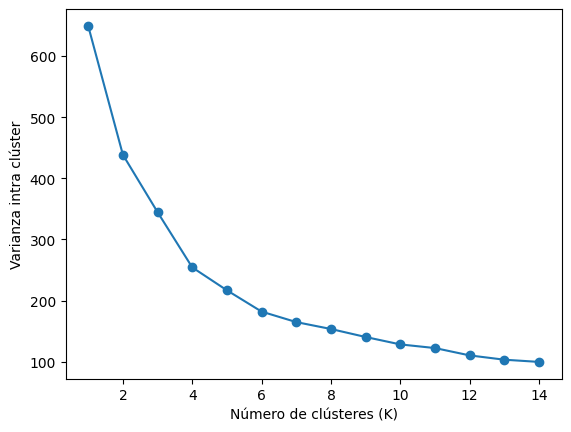

Descripción de los clusters encontrados:
                 Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_KMeans                                                             
0                        54.266667           8.975725                 38   
1                        86.538462          16.312485                 69   
2                        26.285714           7.437357                 16   
3                        88.500000          16.533254                 71   
4                        25.260870           7.723738                 15   
5                        56.657895           9.905708                 39   

                Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_KMeans                                                             
0                              79           49.066667           6.300794   
1                             137           82.128205           9.364489   
2                              39           1

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# bucle for para generar los distintos modelos y calcular la varianza-intra-clusters y el coeficiente de Silhouette

Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 15): # Evaluamos entre 1 a 120 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(datos_estandarizados)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(datos_estandarizados, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_


#Generar "grafica método del codo"
plt.plot(range(1, 15), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()


# Aplicar K-Means con un número de clusters (por ejemplo 5)
kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de K-Means al DataFrame original
df['Cluster_KMeans'] = y_kmeans


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_KMeans').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

#### K-Medoide

In [39]:
from sklearn_extra.cluster import KMedoids


# Aplicar K-Medoides en los datos estandarizados originales
kmedoids = KMedoids(n_clusters=6, random_state=42, method='pam')
y_kmedoids = kmedoids.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de K-Means al DataFrame original
df['Cluster_kmedoids'] = y_kmedoids


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_kmedoids').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

Descripción de los clusters encontrados:
                   Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_kmedoids                                                             
0                          86.538462          16.312485                 69   
1                          24.304348           7.295296                 15   
2                          48.906250          13.289237                 19   
3                          54.117647          12.355258                 16   
4                          46.421053          16.450797                 18   
5                          88.500000          16.533254                 71   

                  Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_kmedoids                                                             
0                               137           82.128205           9.364489   
1                                38           76.521739          15.231157   
2                    

#### Modelo de Mezcla Gaussiana (GMM)

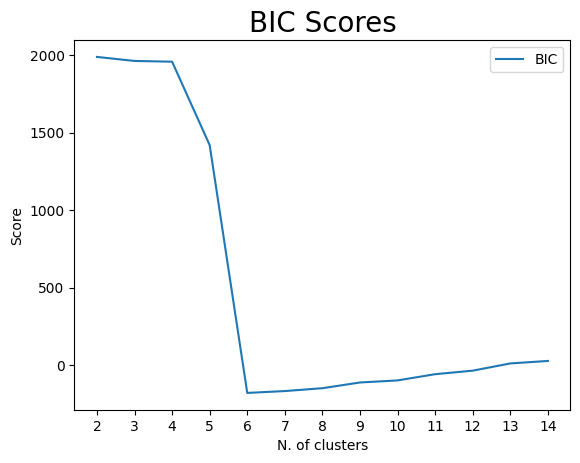

In [48]:
from sklearn.mixture import GaussianMixture

def SelBest(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 15)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(datos_estandarizados) 
        
        tmp_bic.append(gmm.bic(datos_estandarizados))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [45]:

# Aplicar GMM
gmm = GaussianMixture(n_components=6, random_state=42)
y_gmm = gmm.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de GMM al DataFrame original
df['Cluster_GMM'] = y_gmm


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_GMM').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

Descripción de los clusters encontrados:
              Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_GMM                                                             
0                     55.750000           8.713017                 40   
1                     86.538462          16.312485                 69   
2                     26.304348           7.893811                 15   
3                     89.090909          16.451375                 71   
4                     24.950000           7.287155                 15   
5                     54.363636          11.523938                 28   

             Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_GMM                                                             
0                           77           49.076923           6.522498   
1                          137           82.128205           9.364489   
2                           39           20.913043          13.017167   
3       

### Visualizacion


In [69]:
import plotly.express as px

print("Vizualizacion de clusters proyeccion en 3D (Ingreso_Anual, Puntaje_Gasto, Edad):\n")
# Variables a graficar
x = df['Ingreso_Anual'] 
y = df['Puntaje_Gasto']
z = df['Edad']

# Lista de columnas de cluster
clusters = ['Cluster_Jerarquico', 'Cluster_DBSCAN', 'Cluster_KMeans', 'Cluster_kmedoids', 'Cluster_GMM']


# Crear un gráfico 3D interactivo para cada columna de cluster
for cluster in clusters:
    fig = px.scatter_3d(df, x='Ingreso_Anual', y='Puntaje_Gasto', z='Edad',
                        color=cluster, color_continuous_scale='Viridis', title=f'Cluster basado en {cluster}')
    
    # Definir nombre del archivo
    file_name = f"{cluster}_3D.html"
    
    # Guardar el gráfico como archivo HTML
    fig.write_html(os.path.join(results_path, file_name))

    # Mostrar gráfico interactivo
    fig.show()


Vizualizacion de clusters proyeccion en 3D (Ingreso_Anual, Puntaje_Gasto, Edad):



In [70]:

print("Vizualizacion de clusters proyeccion en 2D (Ingreso_Anual, Puntaje_Gasto):\n")
# Variables que vamos a graficar
x = df['Ingreso_Anual']
y = df['Puntaje_Gasto']

# Lista de columnas de cluster
clusters = ['Cluster_Jerarquico', 'Cluster_DBSCAN', 'Cluster_KMeans', 'Cluster_kmedoids', 'Cluster_GMM']

# Crear un gráfico 2D interactivo para cada columna de cluster
for cluster in clusters:
    fig = px.scatter(df, x='Ingreso_Anual', y='Puntaje_Gasto',
                     color=cluster, color_continuous_scale='Viridis', 
                     title=f'Cluster basado en {cluster}',
                     labels={'Ingreso_Anual': 'Ingreso Anual', 'Puntaje_Gasto': 'Puntaje de Gasto'})
    

    # Definir nombre del archivo
    file_name = f"{cluster}_2D.html"
    
    # Guardar el gráfico como archivo HTML
    fig.write_html(os.path.join(results_path, file_name))

    # Mostrar gráfico interactivo
    fig.show()


Vizualizacion de clusters proyeccion en 2D (Ingreso_Anual, Puntaje_Gasto):

